In [1]:
from edc import check_compatibility
check_compatibility("user-0.21.2")

In [2]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `GEODB_API_SERVER_PORT`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_AUTH_DOMAIN`
* `SH_CLIENT_ID`, `SH_CLIENT_NAME`, `SH_CLIENT_SECRET`, `SH_INSTANCE_ID`
* `XCUBE_GEN_API_SERVER_PORT`, `XCUBE_GEN_API_SERVER_URL`, `XCUBE_GEN_API_USER_NAME`, `XCUBE_GEN_AUTH_AUD`, `XCUBE_GEN_AUTH_CLIENT_ID`, `XCUBE_GEN_AUTH_CLIENT_SECRET`, `XCUBE_GEN_AUTH_DOMAIN`

The following additional environment variables have been loaded from `~/custom.env`:
* `AWS_ACCESS_KEY_ID`, `AWS_BUCKET`, `AWS_SECRET_ACCESS_KEY`
* `DAPA_URL`


# Headless notebook execution with result artifacts

Basic documentation for headless notebook execution can [be found here](https://eurodatacube.com/documentation/headless-notebook-execution). In this notebook, we will explain how artifacts (data, images) calculated in the notebook can be marked as results which are then directly available via the WPS API endpoint `results`.

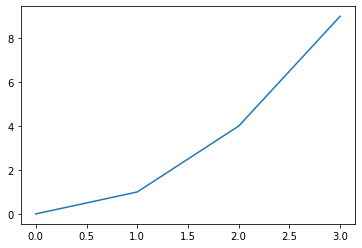

In [3]:
# First, calculate your jobs as you normally would
import matplotlib.pyplot as plt

data = [0, 1, 4, 9]

figure = fig = plt.plot(data)[0].figure

In [4]:
# In order to save the data or the figure as a result, we use the `interact-scrapbook` library.
# For older eurodatacube base images, first install them manually
!python -m pip install nteract-scrapbook -q

In [5]:
import scrapbook as sb

The job server will accept one artifact saved via scrapbook as job result.
Many different data types are supported.
Please consult the [official documentation](https://github.com/nteract/scrapbook) for advanced usages.

Most cases follow the examples below:

### Attach an image / a figure

In order to save an image as job result, use the function `sb.glue` with the `encoder` parameter set to `display`. Many different formats are supported here including `matplotlib.pyplot.Figure` and `IPython.display.Image`:

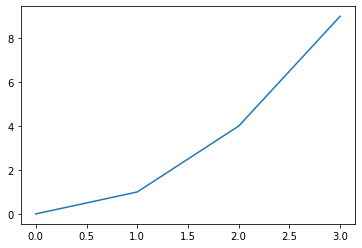

In [6]:
sb.glue("result_key_1", fig, encoder="display")

In case you are using an image format which is not compatible with scrapbook directly, you can also capture the rendered output of a notebook cell:

In [7]:
%%capture captured_output

plt.plot([1, 2, 3])

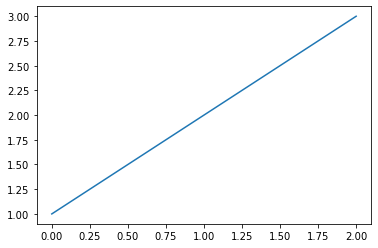

In [8]:
sb.glue("result_key_2", captured_output.outputs[1], encoder="display")

### Attach serializable data

Basic data structures which can be serialized to json can directly be attached:

In [9]:
sb.glue("result_key_3", {1: 2, "a": [3,4]})